In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

iris = load_iris()

col = ['sepal_length','sepal_width', 'petal_length','petal_Width']
iris_df = pd.DataFrame(data=iris.data, columns=col)
iris_df['target'] = iris.target
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_Width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
from sklearn.cluster import KMeans
KM = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
KM.fit(iris_df)

KMeans(n_clusters=3, random_state=0)

In [4]:
# target과 비교
iris_df['target'] = iris.target
iris_df['cluster'] = KM.labels_
iris_result = iris_df.groupby(['target','cluster'])['sepal_length'].count()
iris_result

target  cluster
0       1          50
1       0          50
2       0           1
        2          49
Name: sepal_length, dtype: int64

In [5]:
# 차원을 줄여서 군집화
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

#주성분1, 주성분2
iris_df['pca_x'] = pca_transformed[:, 0]
iris_df['pca_y'] = pca_transformed[:, 1]
iris_df.head()


,sepal_length,sepal_width,petal_length,petal_Width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,1,-2.728717,0.326755


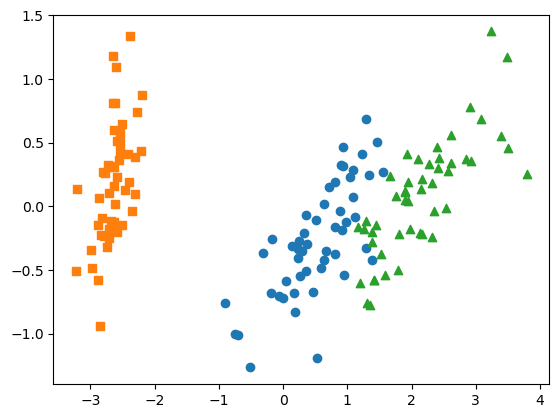

In [6]:
plt.scatter(x=iris_df.loc[iris_df['cluster']==0, 'pca_x'], y=iris_df.loc[iris_df['cluster']==0,'pca_y'], marker='o')
plt.scatter(x=iris_df.loc[iris_df['cluster']==1, 'pca_x'], y=iris_df.loc[iris_df['cluster']==1,'pca_y'], marker='s')
plt.scatter(x=iris_df.loc[iris_df['cluster']==2, 'pca_x'], y=iris_df.loc[iris_df['cluster']==2,'pca_y'], marker='^')

# 클러스터링을 위한 데이터셋 생성
-make_blobs() 개별 군집의 중심점, 표준 편차 제어 기능 \
-make_classification() 노이즈를 포함한 데이터 만들기 유용 \
-make_circle(),make_moon() 군집화로 해결하기 어려운 데이터 세트 만드는데 유용

In [8]:
from sklearn.datasets import make_blobs

# X=피처 데이터 세트, Y=군집 타깃 데이터
X,y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

(200, 2) (200,)


In [9]:
cluster_df = pd.DataFrame(X, columns=['ftr1','ftr2'])
cluster_df['target'] = y
cluster_df.head()

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0


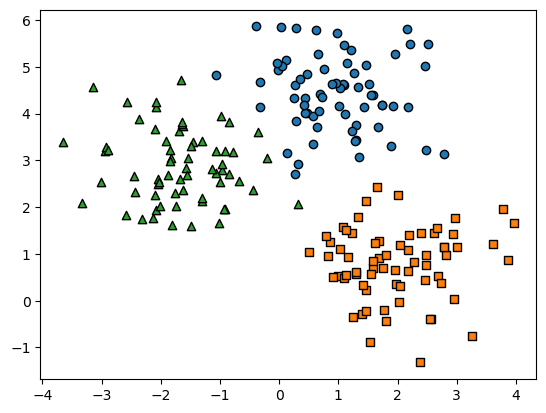

In [10]:
target_list = np.unique(y)

markers = ['o','s','^','P','D','H','x']
for target in target_list:
    target_cluster = cluster_df[cluster_df['target']==target]
    plt.scatter(x=target_cluster['ftr1'],y=target_cluster['ftr2'], edgecolor='k', marker=markers[target])

In [61]:
from sklearn.cluster import KMeans
KM = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
cluster_labels = KM.fit_predict(X)
cluster_df['kmeans_label'] = cluster_labels
cluster_df.head()

,ftr1,ftr2,target,kmeans_label
0,-1.692427,3.622025,2,1
1,0.697940,4.428867,0,0
2,1.100228,4.606317,0,0
3,-1.448724,3.384245,2,1
4,1.214861,5.364896,0,0


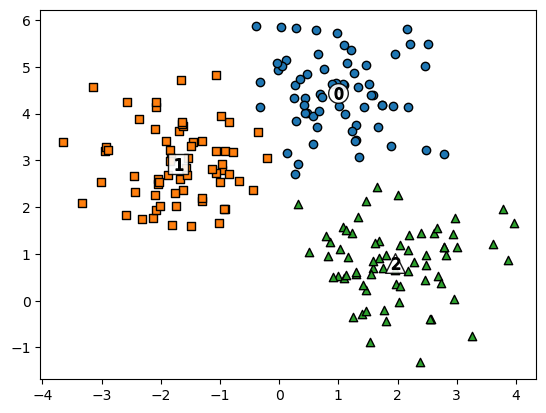

In [62]:
centers = KM.cluster_centers_
cluster_list = np.unique(cluster_labels)

markers = ['o','s','^','P','D','H','x']
for cluster in cluster_list:
    # 각 클러스터 레이블이 cluster인 데이터 프레임 값 시각화
    label_cluster = cluster_df[cluster_df['kmeans_label']==cluster]
    center_x_y = centers[cluster]


    plt.scatter(x=label_cluster['ftr1'],y=label_cluster['ftr2'], edgecolor='k', marker=markers[cluster])
    
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                alpha=0.9, edgecolor='k', marker=markers[cluster])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',
                edgecolor='k', marker='$%d$' % cluster)
    
plt.show()

In [63]:
from sklearn.metrics import silhouette_score, silhouette_samples

score_samples = silhouette_samples(iris.data, iris_df['cluster'])
score_samples
iris_df['silhouette_coeff'] = score_samples
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_Width,target,cluster,pca_x,pca_y,silhouette_coeff
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397,0.846713
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001,0.807609
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949,0.822507
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-0.318299,0.796992
4,5.0,3.6,1.4,0.2,0,1,-2.728717,0.326755,0.843070


In [64]:
silhouette_score(iris.data, iris_df['cluster'])

0.5111496981090733

In [65]:
# silhouette 차트

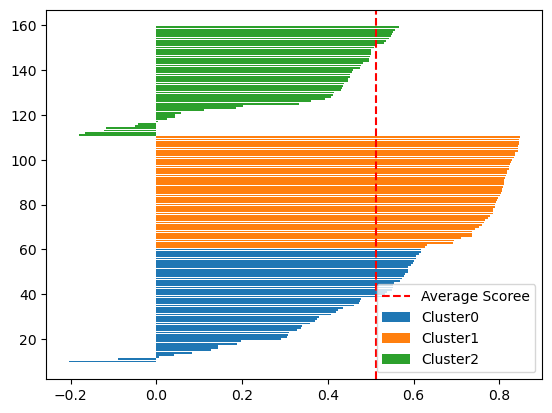

In [66]:
y_lower = 10
for i in range(3):
    cluster_i = score_samples[iris_df['cluster']==i]
    cluster_i.sort()
    y_upper = y_lower + len(cluster_i)
    plt.barh(range(y_lower, y_upper), cluster_i, edgecolor='none',label=f'Cluster{i}')
    y_lower = y_upper

avg_score = silhouette_score(iris.data, iris_df['cluster'])
plt.axvline(avg_score, color='red', linestyle='--', label='Average Scoree')
plt.legend()
plt.show()

c:\Users\LYJ\anaconda3\envs\xgboost_env\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


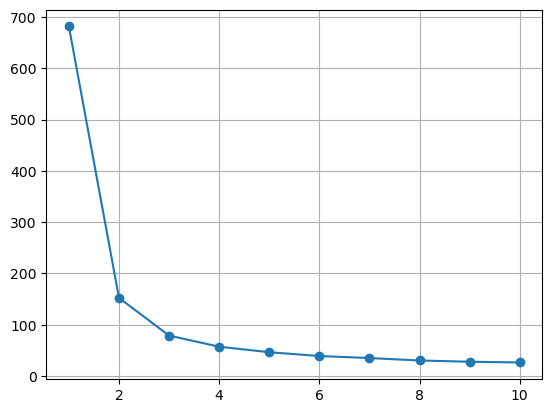

In [67]:
# scree plot
inertia = []

k_values = range(1,11)
for k in k_values:
    kmeans =KMeans(n_clusters=k)
    kmeans.fit(iris.data)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, marker='o')
plt.grid()
plt.show()

In [68]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

(500, 2) (500,)


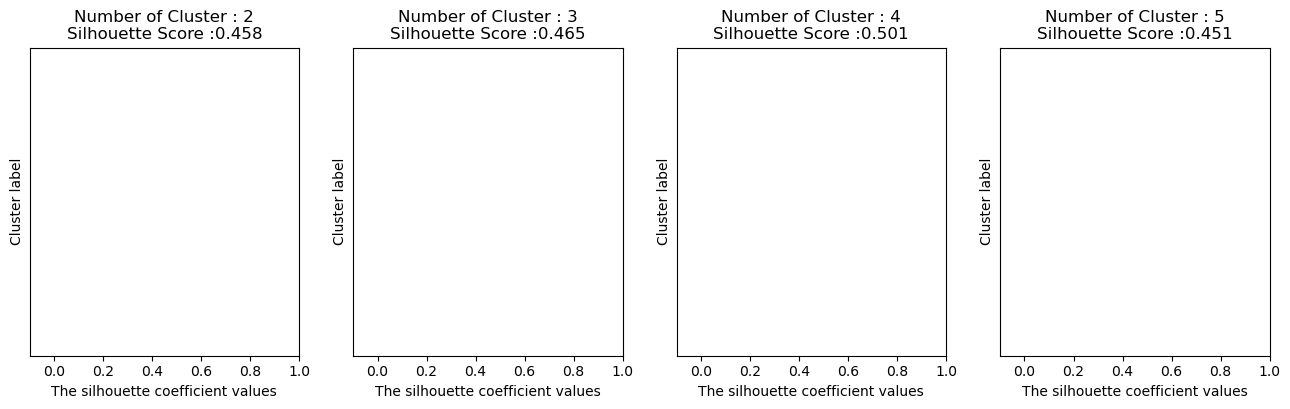

In [73]:
from sklearn.datasets import make_blobs

X,y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, center_box=(-10.0, 10.0),shuffle=True, random_state=0)
print(X.shape, y.shape)

cluster_list = [2,3,4,5]
visualize_silhouette(cluster_list, X)